In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import numpy as np
import learners
import utils
import learn_ann
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import keras.backend as K
from keras.regularizers import Regularizer
from keras.layers import Input, Dense
from keras.models import Model

In [3]:
%matplotlib inline

In [4]:
X, Y = learn_ann.read_dataset('/home/shannon/HMRI/experiments/datasets/functions/add5.npz')

In [5]:
X_trg, Y_trg, X_tst, Y_tst = learn_ann.random_split(X, Y, 64, 123456789)

In [6]:
Y_trg_0 = Y_trg[:, [0]]
Y_tst_0 = Y_tst[:, [0]]
Y_trg_1 = Y_trg[:, [1]]
Y_tst_1 = Y_tst[:, [1]]
Y_trg_2 = Y_trg[:, [2]]
Y_tst_2 = Y_tst[:, [2]]
Y_trg_3 = Y_trg[:, [3]]
Y_tst_3 = Y_tst[:, [3]]
Y_trg_4 = Y_trg[:, [4]]
Y_tst_4 = Y_tst[:, [4]]

In [7]:
model_0_soft = learners.one_hidden_layer_learner(X_trg, Y_trg_0, 20, 'tanh', 'mse', 'RMSprop', 
                                          {'epochs': 2000, 'batch_size': 16})
learn_ann.errors(model_0_soft, X_trg, Y_trg_0, X_tst, Y_tst_0)

{'test_err': 0.0020833333333333333,
 'test_errs': array([ 0.00208333]),
 'test_mcc': 0.99584134740062602,
 'test_mccs': array([ 0.99584135]),
 'trg_err': 0.0,
 'trg_errs': array([ 0.]),
 'trg_mcc': 1.0,
 'trg_mccs': array([ 1.])}

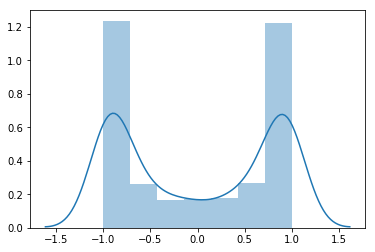

In [8]:
A0 = utils.get_activations(model_0_soft, X_trg, 1)
sns.distplot(A0.flatten())

In [9]:
model_0_soft.get_config()

{'input_layers': [['input_1', 0, 0]],
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 10),
    'dtype': 'float32',
    'name': 'input_1',
    'sparse': False},
   'inbound_nodes': [],
   'name': 'input_1'},
  {'class_name': 'Dense',
   'config': {'activation': 'tanh',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'distribution': 'uniform',
      'mode': 'fan_avg',
      'scale': 1.0,
      'seed': None}},
    'kernel_regularizer': None,
    'name': 'hidden',
    'trainable': True,
    'units': 20,
    'use_bias': True},
   'inbound_nodes': [[['input_1', 0, 0, {}]]],
   'name': 'hidden'},
  {'class_name': 'Dense',
   'config': {'activation': 'tanh',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'cl

In [10]:
model_0_soft.to_json()

'{"class_name": "Model", "config": {"name": "model_1", "layers": [{"name": "input_1", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 10], "dtype": "float32", "sparse": false, "name": "input_1"}, "inbound_nodes": []}, {"name": "hidden", "class_name": "Dense", "config": {"name": "hidden", "trainable": true, "units": 20, "activation": "tanh", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "inbound_nodes": [[["input_1", 0, 0, {}]]]}, {"name": "dense_1", "class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "units": 1, "activation": "tanh", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fa

In [24]:
model_0_soft.layers[1].get_weights()

[array([[  1.34848142e+00,   6.91271871e-02,   7.75499940e-01,
           1.17835283e-01,  -1.78265977e+00,   1.53167975e+00,
          -2.36103669e-01,  -4.12745267e-01,   1.26389518e-01,
           4.45715874e-01,  -1.52832246e+00,   1.24851561e+00,
           6.73283398e-01,  -1.43314910e+00,  -8.87159467e-01,
          -7.05731094e-01,  -1.61128700e-01,  -1.04291952e+00,
           6.74079239e-01,  -5.33085942e-01],
        [  4.72749770e-02,  -5.07423341e-01,   7.10759819e-01,
          -7.59913996e-02,  -6.44964650e-02,   1.07104592e-01,
           3.61507088e-02,  -2.18431026e-01,   2.34788105e-01,
          -4.55579519e-01,   4.47053164e-02,  -5.17712712e-01,
          -4.24066409e-02,  -2.02060074e-01,   5.72083611e-03,
           4.01254408e-02,   1.87570930e-01,  -1.07899224e-02,
          -3.76858562e-01,   5.64694047e-01],
        [  2.19942138e-01,   6.78931028e-02,   1.61804661e-01,
           4.92677629e-01,  -1.23849399e-01,  -1.32675760e-03,
          -4.31181341e-01,

In [13]:
model_0_soft_2 = keras.Model.from_config(model_0_soft.get_config())

In [18]:
model_0_soft.get_weights()

[autoreload of learners failed: Traceback (most recent call last):
  File "/home/shannon/.local/opt/miniconda3/envs/keras/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/home/shannon/.local/opt/miniconda3/envs/keras/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/home/shannon/.local/opt/miniconda3/envs/keras/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/shannon/.local/opt/miniconda3/envs/keras/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen i

[array([[  1.34848142e+00,   6.91271871e-02,   7.75499940e-01,
           1.17835283e-01,  -1.78265977e+00,   1.53167975e+00,
          -2.36103669e-01,  -4.12745267e-01,   1.26389518e-01,
           4.45715874e-01,  -1.52832246e+00,   1.24851561e+00,
           6.73283398e-01,  -1.43314910e+00,  -8.87159467e-01,
          -7.05731094e-01,  -1.61128700e-01,  -1.04291952e+00,
           6.74079239e-01,  -5.33085942e-01],
        [  4.72749770e-02,  -5.07423341e-01,   7.10759819e-01,
          -7.59913996e-02,  -6.44964650e-02,   1.07104592e-01,
           3.61507088e-02,  -2.18431026e-01,   2.34788105e-01,
          -4.55579519e-01,   4.47053164e-02,  -5.17712712e-01,
          -4.24066409e-02,  -2.02060074e-01,   5.72083611e-03,
           4.01254408e-02,   1.87570930e-01,  -1.07899224e-02,
          -3.76858562e-01,   5.64694047e-01],
        [  2.19942138e-01,   6.78931028e-02,   1.61804661e-01,
           4.92677629e-01,  -1.23849399e-01,  -1.32675760e-03,
          -4.31181341e-01,

In [16]:
model_0_soft_2.set_weights(model_0_soft.get_weights())

In [17]:
learn_ann.errors(model_0_soft_2, X_trg, Y_trg_0, X_tst, Y_tst_0)

{'test_err': 0.0020833333333333333,
 'test_errs': array([ 0.00208333]),
 'test_mcc': 0.99584134740062602,
 'test_mccs': array([ 0.99584135]),
 'trg_err': 0.0,
 'trg_errs': array([ 0.]),
 'trg_mcc': 1.0,
 'trg_mccs': array([ 1.])}

In [12]:
def bipolar_activation(x):
    cond = K.less(x, K.zeros_like(x))
    out = K.switch(cond, -K.ones_like(x), K.ones_like(x))
    return out

def thresholded_copy(trained_model):

    assert len(trained_model.layers) == 3
    
    # input tensor
    inp = trained_model.input
    trained_h = trained_model.layers[1]
    Lh = Dense(trained_h.units, activation=K.sign, trainable=False,
               weights=trained_h.get_weights())
    h = Lh(inp)
    
    trained_out = trained_model.layers[2]
    Lout = Dense(trained_out.units, activation=K.sign,
                 weights=trained_out.get_weights())
    out = Lout(h)
    
    model = Model(inputs=inp, outputs=out)

    return model

In [13]:
model_0_hard = thresholded_copy(model_0_soft)

In [40]:
def layered_learner(X, Y, Nh, nonlinearity, loss, optimizer, fit_kwargs, 
                    use_mask, which_layers):
    # Single Nh-unit hidden layer - one net per tgt
    # Same layer structure as 'parallel'
    A = X
    Ni = X.shape[1]
    No = Y.shape[1]
    remaining_targets = np.arange(No, dtype=int)
    learned_targets = []
    feature_sets = []
    submodels = []

    for i in range(No):
        print('strata {}'.format(i))
        remaining_targets = np.setdiff1d(remaining_targets, learned_targets)

        order, F = utils.minfs_curriculum(A, Y[:, remaining_targets])
        t_ = order[0]                  # Get the target ranked as "easiest"
        fs = F[t_]                 # Get the feature set for that target
        t = remaining_targets[t_]  # Get the true index of that target

        print('  target: {}'.format(i))

        # New input matrix
        if use_mask:
            X_prime = A[:, fs]
        else:
            X_prime = A
        submodel = learners.one_hidden_layer_learner(X_prime, Y[:, [t]], Nh, 
                                            nonlinearity, loss, optimizer,
                                            fit_kwargs)

        print('  learned')


        # append new activations
        H = utils.get_activations(submodel, X_prime, 1)
        
        if which_layers == 'input+prev':
            # Use X instead of A to prevent growth
            A = np.hstack([X, H])
        elif which_layers == 'all':
            A = np.hstack([A, H])
        
        learned_targets.append(t)
        submodels.append(submodel)
        feature_sets.append(fs)

    print('finished, joining strata.')

    return learned_targets, submodels, feature_sets


In [41]:
learned_targets, submodels, feature_sets = layered_learner(
    X_trg, Y_trg, 20, 'tanh', 'mse', 'RMSprop', {'epochs': 2000, 'batch_size': 16},
    use_mask=True, which_layers='input+prev')

strata 0
  target: 0
  learned
strata 1
  target: 1
  learned
strata 2
  target: 2
  learned
strata 3
  target: 3
  learned
strata 4
  target: 4
  learned
finished, joining strata.


In [42]:
feature_sets

[[0, 5], [1, 6, 10], [2, 7, 11], [3, 8, 10], [4, 9, 16]]

In [51]:
model = learners.join_models(X_trg.shape[1], learned_targets, submodels,
                    feature_sets, True, 'input+prev')

In [53]:
learn_ann.errors(model, X_trg, Y_trg, X_tst, Y_tst)

{'test_err': 0.0,
 'test_errs': array([ 0.,  0.,  0.,  0.,  0.]),
 'test_mcc': 1.0,
 'test_mccs': array([ 1.,  1.,  1.,  1.,  1.]),
 'trg_err': 0.0,
 'trg_errs': array([ 0.,  0.,  0.,  0.,  0.]),
 'trg_mcc': 1.0,
 'trg_mccs': array([ 1.,  1.,  1.,  1.,  1.])}

strata 0
  target: 0
  learned
strata 1
  target: 1
  learned
strata 2
  target: 2
  learned
strata 3
  target: 3
  learned
strata 4
  target: 4
  learned
finished, joining strata.


TypeError: can only concatenate list (not "int") to list

In [30]:
temp = Input((4,))

In [34]:
K.get_variable_shape(temp)

(None, 4)

In [29]:
K.eye(.shape[1])

TypeError: num_rows and num_columns must be positive integer values.

NameError: name 'model' is not defined

In [15]:
H = utils.get_activations(model_0_soft, X_trg, 1)

In [16]:
A = np.hstack([X_trg, H])

In [17]:
order, F = utils.minfs_curriculum(A, Y_trg[:, 1:])

In [19]:
order

array([0, 1, 3, 2])

In [20]:
F

array([list([1, 6, 20]), list([1, 2, 6, 7, 20]),
       list([1, 3, 4, 7, 8, 9, 19]), list([1, 2, 3, 4, 9, 11, 28])], dtype=object)

In [21]:
A[:, F[0]]

array([[ 1.        ,  1.        ,  0.94223475],
       [-1.        ,  1.        ,  0.8908112 ],
       [-1.        ,  1.        ,  0.99991506],
       [ 1.        ,  1.        ,  0.97109836],
       [ 1.        ,  1.        ,  0.99993569],
       [-1.        ,  1.        ,  0.9997763 ],
       [ 1.        ,  1.        ,  0.96542388],
       [ 1.        , -1.        , -0.90166706],
       [ 1.        ,  1.        ,  0.99982363],
       [ 1.        , -1.        , -0.86165524],
       [-1.        ,  1.        ,  0.99988413],
       [ 1.        ,  1.        ,  0.9426049 ],
       [-1.        , -1.        ,  0.90693766],
       [ 1.        , -1.        , -0.890827  ],
       [ 1.        , -1.        , -0.88519275],
       [ 1.        ,  1.        ,  0.94287419],
       [ 1.        , -1.        ,  0.94722664],
       [ 1.        ,  1.        ,  0.94032514],
       [-1.        , -1.        ,  0.92115897],
       [-1.        , -1.        , -0.93106067],
       [ 1.        , -1.        ,  0.922

In [ ]:
F = K.eye(Nf)[:, fs]
Af = Dense(len(fs), weights=[F])  # identity activation

In [97]:
h(model_hard.input)[:, [1,3,4]]

TypeError: can only concatenate list (not "int") to list

In [92]:
h

TypeError: 'Dense' object is not subscriptable

In [90]:
model_hard.predict(X_trg)

array([[ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.]], dtype=float32)

In [60]:
h_bin = model_bin.layers[1]
h_hard = model_hard.layers[1]

In [64]:
h_hard.set_weights(h_bin.get_weights())

In [32]:
h.set_weights(model_bin.layers[1].get_weights())

In [48]:
h.activation

<function keras.backend.tensorflow_backend.sign>

In [68]:
A0_bin_hard = learners.get_activations(model_hard, X_trg)

In [69]:
A0_bin_hard

[array([[ 1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1.],
        [-1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.],
        [-1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1.],
        [ 1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.],
        [-1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1.],
        [-1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.],
        [-1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.],
        [ 1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1.],
        [-1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.],
        [ 1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.],
        [-1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.],
        [-1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.],
        [-1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.],
        [ 1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.],
        [ 1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.],
        [-1.,  1., -1., -1., -1.,  1., -

In [52]:
learners.get_activations(model_bin, X_trg)

[array([[ 1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1.],
        [-1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.],
        [-1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1.],
        [ 1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.],
        [-1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1.],
        [-1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.],
        [-1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.],
        [ 1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1.],
        [-1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.],
        [ 1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.],
        [-1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.],
        [-1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.],
        [-1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.],
        [ 1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.],
        [ 1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.],
        [-1.,  1., -1., -1., -1.,  1., -

In [70]:
learners.get_activations(model_hard, X_trg, 1)

array([[-1.,  1.,  1., ...,  1., -1., -1.],
       [ 1., -1., -1., ...,  1., -1., -1.],
       [-1., -1., -1., ...,  1.,  1., -1.],
       ..., 
       [ 1., -1.,  1., ...,  1.,  1.,  1.],
       [ 1., -1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ..., -1., -1.,  1.]], dtype=float32)

In [71]:
learners.get_activations(model_bin, X_trg, 1)

array([[-0.99943721,  1.        ,  0.99999994, ...,  0.98822486,
        -0.99384546, -0.98448002],
       [ 0.99990475, -1.        , -1.        , ...,  0.9959324 ,
        -0.98724461, -0.9396199 ],
       [-0.99829018, -1.        , -0.99998611, ...,  0.99999815,
         0.99999964, -0.99999416],
       ..., 
       [ 0.9987697 , -0.99105674,  0.99999869, ...,  0.99782532,
         0.99495721,  0.99646699],
       [ 0.9999842 , -0.99053973,  0.99536258, ...,  0.99999899,
         0.97892302,  1.        ],
       [ 0.99999958,  1.        ,  1.        , ..., -0.99999642,
        -0.99986941,  0.99999672]], dtype=float32)

In [73]:
learn_ann.errors(model_bin, X_trg, Y_trg_0, X_tst, Y_tst_0)

{'test_err': 0.11145833333333334,
 'test_errs': array([ 0.11145833]),
 'test_mcc': 0.69009135343571182,
 'test_mccs': array([ 0.69009135]),
 'trg_err': 0.0,
 'trg_errs': array([ 0.]),
 'trg_mcc': 1.0,
 'trg_mccs': array([ 1.])}

In [72]:
learn_ann.errors(model_hard, X_trg, Y_trg_0, X_tst, Y_tst_0)

{'test_err': 0.13645833333333332,
 'test_errs': array([ 0.13645833]),
 'test_mcc': 0.63179423380428712,
 'test_mccs': array([ 0.63179423]),
 'trg_err': 0.0,
 'trg_errs': array([ 0.]),
 'trg_mcc': 1.0,
 'trg_mccs': array([ 1.])}

In [74]:
model_hard.fit(X_trg, Y_trg_0, verbose=0, **{'epochs': 2000, 'batch_size': 16})
learn_ann.errors(model_hard, X_trg, Y_trg_0, X_tst, Y_tst_0)

{'test_err': 0.13645833333333332,
 'test_errs': array([ 0.13645833]),
 'test_mcc': 0.63179423380428712,
 'test_mccs': array([ 0.63179423]),
 'trg_err': 0.0,
 'trg_errs': array([ 0.]),
 'trg_mcc': 1.0,
 'trg_mccs': array([ 1.])}

In [77]:
model_bin.predict(X_tst)

array([[ 1.        ],
       [-0.83622783],
       [ 0.98142833],
       [-0.99999028],
       [-0.99990338],
       [-0.99996525],
       [-0.9987902 ],
       [-0.9999963 ],
       [ 0.99987501],
       [-0.06860477],
       [ 0.68612331],
       [ 0.99859065],
       [ 0.87813473],
       [ 0.99963707],
       [ 0.988594  ],
       [ 0.96275306],
       [ 0.9373216 ],
       [ 0.96515507],
       [ 0.96809828],
       [-0.98732144],
       [-0.99972361],
       [-0.99999547],
       [-0.99994427],
       [ 1.        ],
       [-0.98596072],
       [ 1.        ],
       [-0.48626614],
       [-0.94148475],
       [ 0.81231183],
       [ 0.9999724 ],
       [-0.97453058],
       [-0.99995297],
       [ 0.9999966 ],
       [-0.99999905],
       [ 0.71304798],
       [ 0.99999726],
       [-0.3154279 ],
       [-0.99877304],
       [-0.9999975 ],
       [ 0.99730265],
       [-0.99684644],
       [-0.74783617],
       [-0.99233449],
       [-0.99719596],
       [-0.63081843],
       [ 1

In [85]:
h.output_shape

(None, 20)

In [ ]:
model_bin.layers[0].out

In [78]:
model_hard_2 = thresholded_copy(model)

In [79]:
learn_ann.errors(model, X_trg, Y_trg_0, X_tst, Y_tst_0)

{'test_err': 0.046875,
 'test_errs': array([ 0.046875]),
 'test_mcc': 0.8512060736667757,
 'test_mccs': array([ 0.85120607]),
 'trg_err': 0.0,
 'trg_errs': array([ 0.]),
 'trg_mcc': 1.0,
 'trg_mccs': array([ 1.])}

In [80]:
learn_ann.errors(model_hard_2, X_trg, Y_trg_0, X_tst, Y_tst_0)

{'test_err': 0.074999999999999997,
 'test_errs': array([ 0.075]),
 'test_mcc': 0.77329420967486839,
 'test_mccs': array([ 0.77329421]),
 'trg_err': 0.0,
 'trg_errs': array([ 0.]),
 'trg_mcc': 1.0,
 'trg_mccs': array([ 1.])}

In [83]:
learners.get_activations(model_hard_2, X_tst)

[array([[ 1.,  1., -1., ...,  1.,  1., -1.],
        [-1., -1.,  1., ...,  1., -1., -1.],
        [ 1.,  1., -1., ..., -1., -1.,  1.],
        ..., 
        [-1.,  1., -1., ..., -1.,  1., -1.],
        [-1., -1.,  1., ...,  1., -1.,  1.],
        [-1., -1., -1., ...,  1., -1.,  1.]], dtype=float32),
 array([[ 1.,  1., -1., ..., -1., -1., -1.],
        [-1.,  1., -1., ..., -1., -1., -1.],
        [ 1., -1., -1., ...,  1.,  1.,  1.],
        ..., 
        [ 1., -1.,  1., ...,  1.,  1., -1.],
        [-1.,  1.,  1., ..., -1., -1., -1.],
        [-1.,  1.,  1., ..., -1., -1.,  1.]], dtype=float32),
 array([[ 1.],
        [-1.],
        [ 1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [ 1.],
        [-1.],
        [-1.],
        [-1.],
        [ 1.],
        [ 1.],
        [-1.],
        [ 1.],
        [ 1.],
        [-1.],
        [ 1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [ 1.],
        [-1.],
        [ 1.],
        

In [106]:
A0_bin_hard = learners.get_activations(model_bin, X_trg, 'hidden')

In [107]:
A0_bin

array([[-0.97708786,  0.9947049 , -0.99998617, ...,  0.9999997 ,
         0.98989254,  0.9999963 ],
       [-0.98907661, -0.9999662 , -0.99991864, ..., -0.99999988,
         0.99999088, -0.99838257],
       [ 0.99994844, -1.        ,  0.9999826 , ...,  0.99958742,
         0.9999997 , -0.87894469],
       ..., 
       [-0.95265651,  0.99995059,  0.99991965, ..., -0.99869746,
        -1.        , -0.97362167],
       [ 1.        ,  0.9998343 ,  0.99995559, ..., -0.9996537 ,
        -0.9999904 , -1.        ],
       [-1.        ,  0.99998724, -1.        , ...,  1.        ,
         0.9976207 , -0.98685724]], dtype=float32)

In [108]:
A0_bin_hard

array([[-0.97708786,  0.9947049 , -0.99998617, ...,  0.9999997 ,
         0.98989254,  0.9999963 ],
       [-0.98907661, -0.9999662 , -0.99991864, ..., -0.99999988,
         0.99999088, -0.99838257],
       [ 0.99994844, -1.        ,  0.9999826 , ...,  0.99958742,
         0.9999997 , -0.87894469],
       ..., 
       [-0.95265651,  0.99995059,  0.99991965, ..., -0.99869746,
        -1.        , -0.97362167],
       [ 1.        ,  0.9998343 ,  0.99995559, ..., -0.9996537 ,
        -0.9999904 , -1.        ],
       [-1.        ,  0.99998724, -1.        , ...,  1.        ,
         0.9976207 , -0.98685724]], dtype=float32)

In [113]:
A0_bin[A0_bin <= 0].max(), A0_bin[A0_bin >= 0].min()

(-0.87894469, 0.85897833)

In [114]:
A0[A0 <= 0].max(), A0[A0 >= 0].min()

(-0.0094669303, 0.0015580639)